In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

## Data Exploration

In [2]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Here we have 6 discrete labels for quality, the description on kaggle reccomends having a binary class label where > 6.5 is good, otherwise bad/not good.

In [4]:
# Rewrites 'quality' column to 'high' if it's > 6.5, 'low' otherwise
df['quality'] = ['high' if i > 6.5 else 'low' for i in df.quality]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4     low  
1         9.8     low  
2         9.8     low  
3         9.8     low  
4         9.4     low  
...       ...     ...  
1594     10.5     low  
1595     11.2     low  
1596     11.0     low  
1597     10.2     low  
1598     11.0     low  

[1599 rows x 12 columns]

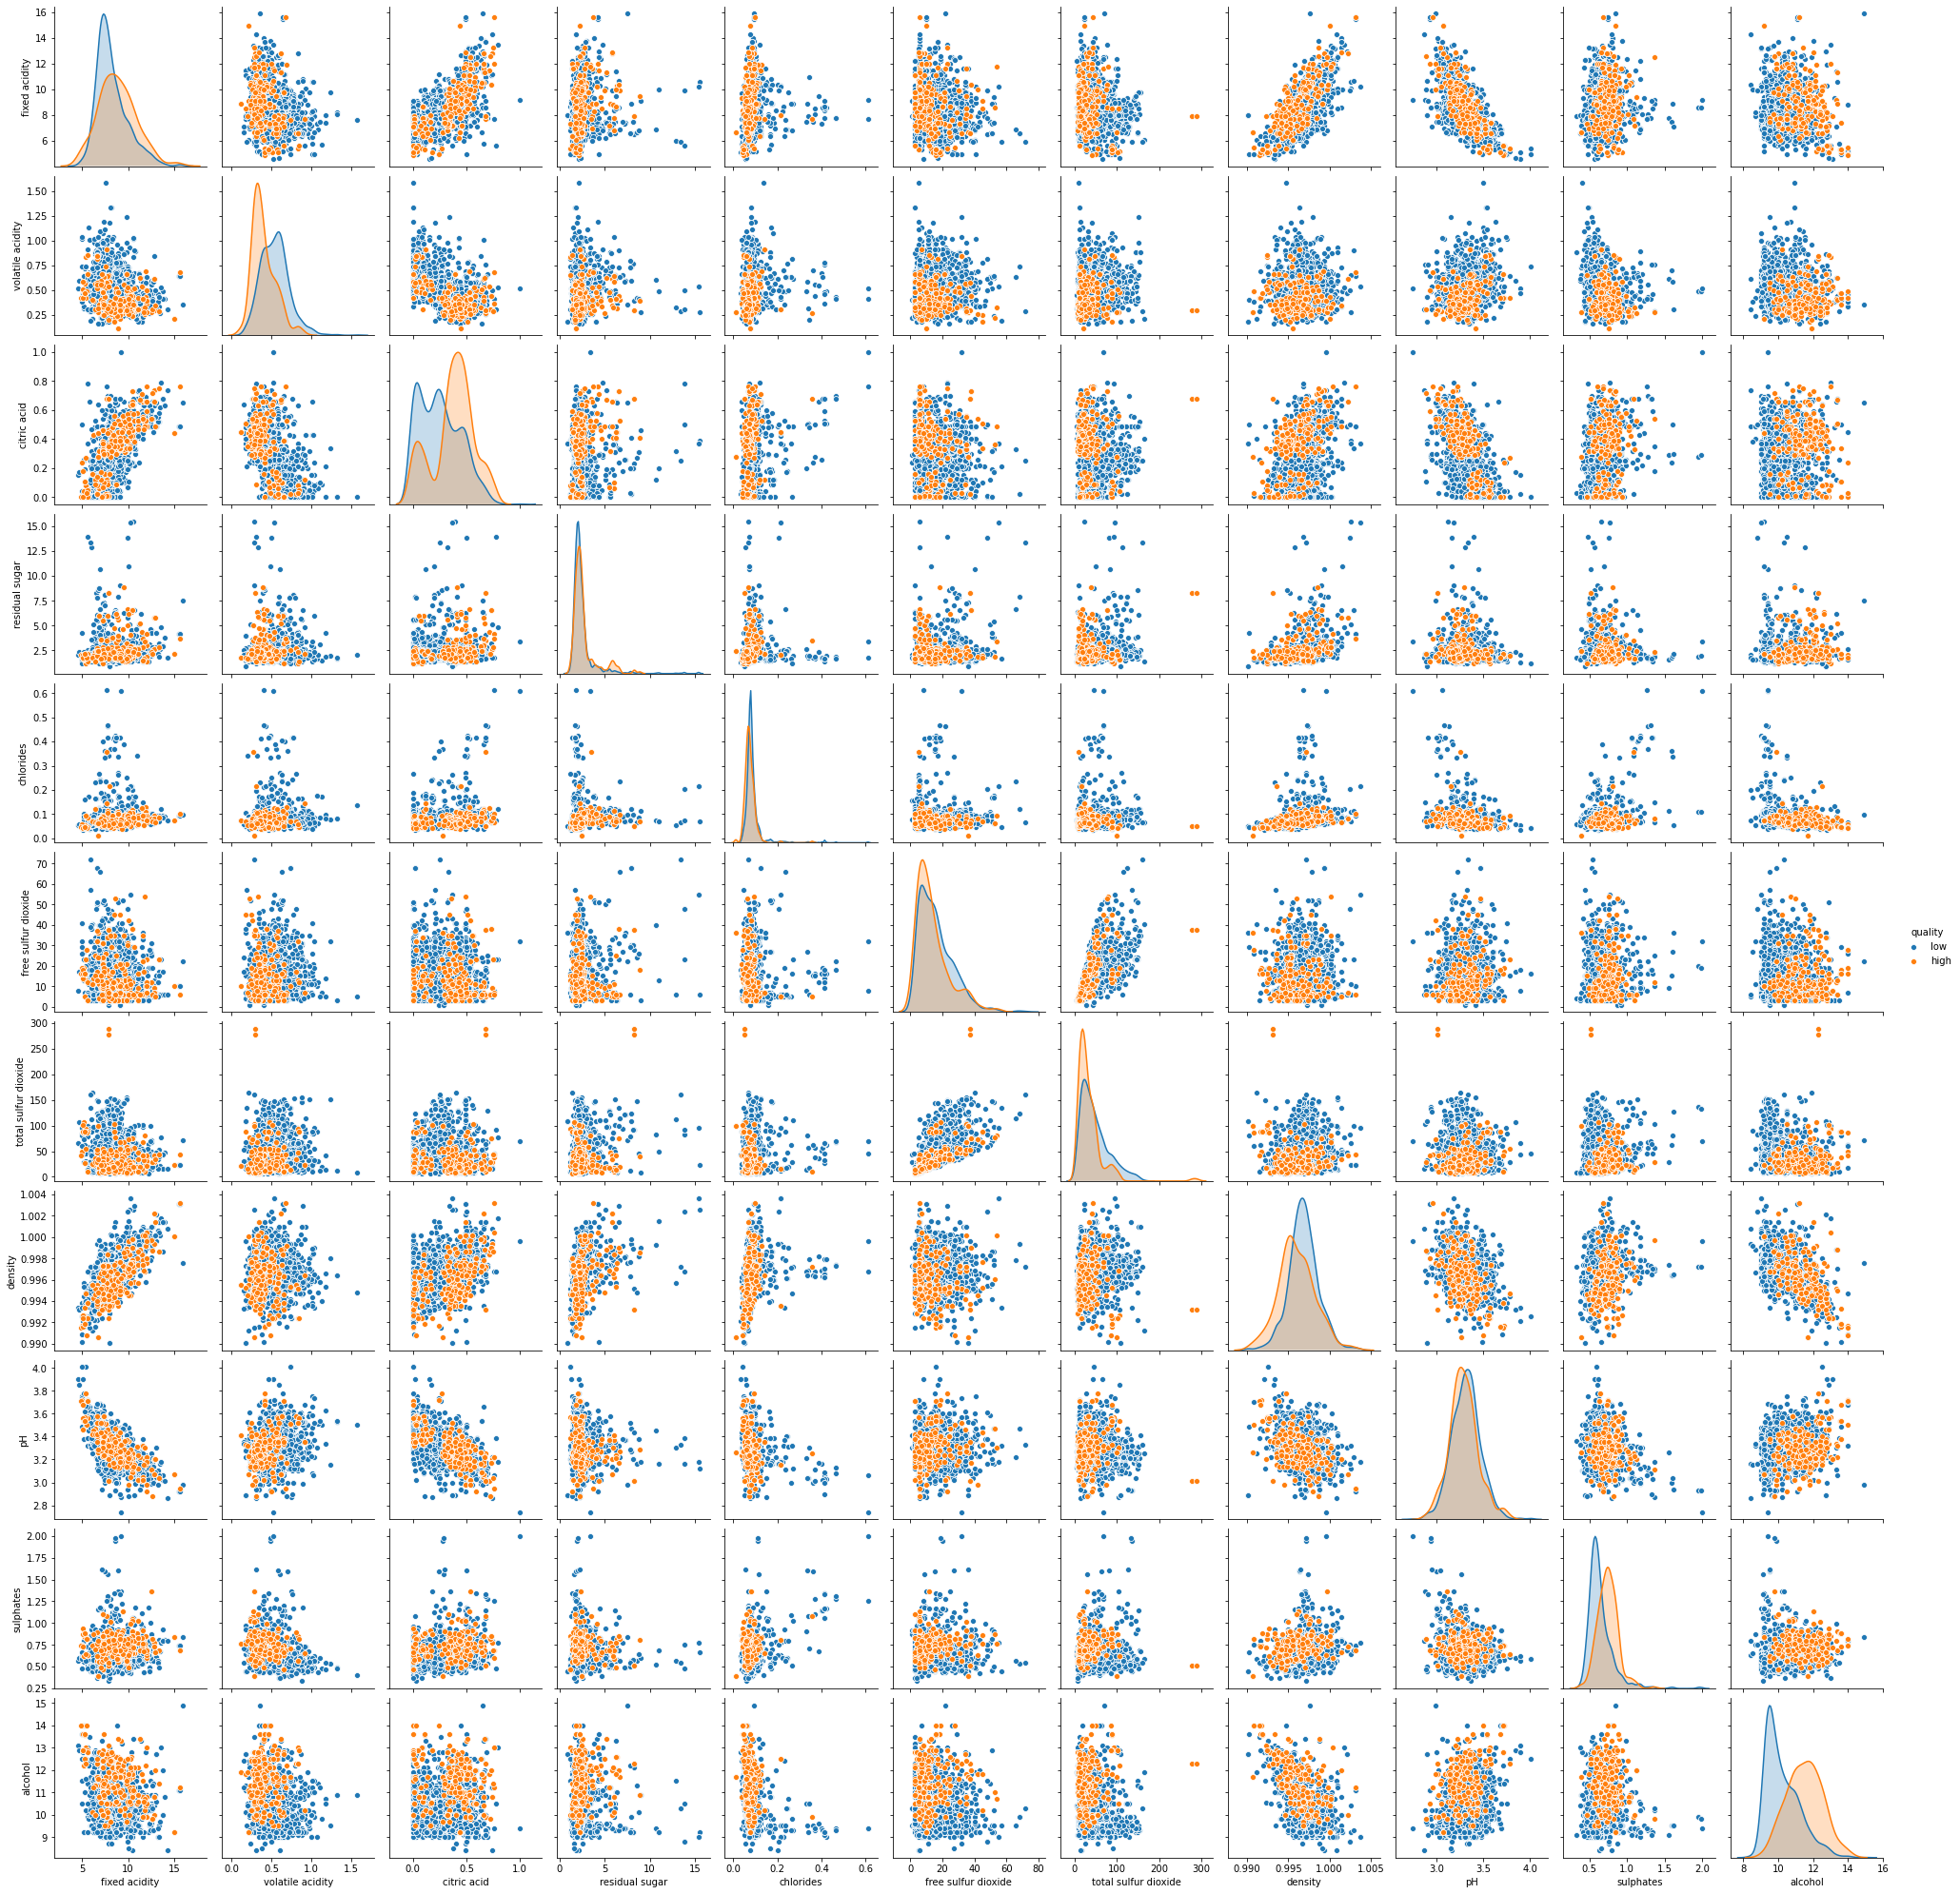

In [5]:
sns.pairplot(df, hue = 'quality')

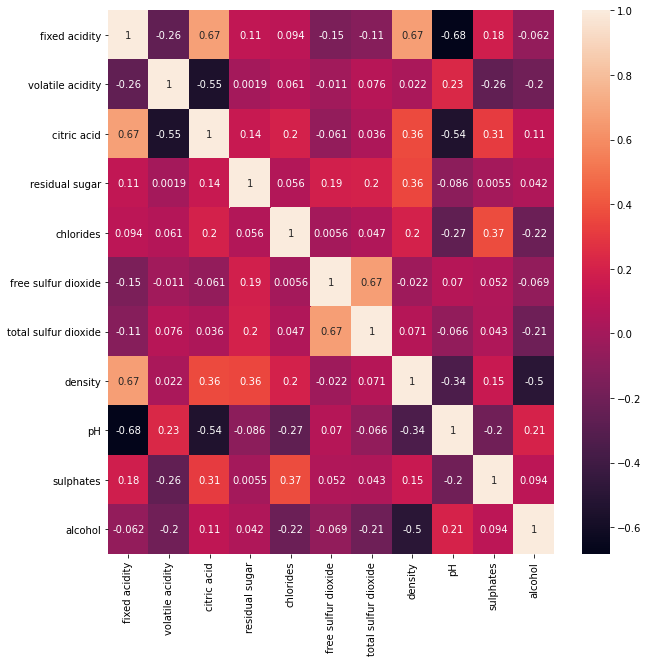

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Some ideas: 
- I like the wine data set because I would reason that it has the potential to be clusterial in a 'radial' manner
- Taking a certain cutoff for 'good quality' and 'bad quality' I think that the good quality datapoints are more tightly clustered together, with lower quality radiating outward from this region
- I would like to motivate some way to determine this cutoff rather than arbitrarily choosing it, it can be so that the catagories are evenly balanced, or by statistical significance. 
- On the otherhand we could 'grid search' each possible cutoff against a list of possible variances to set for spectral clustering, determining which one is the most accurate (in comparison to the actual qualities)
- Would certainly need to 'drop' some of the varaibles, I don't think PCA is nessesary and would probably interfere with the efficacy of spectral clustering, but I think there should be a way we can determine which varaibles add the least 'nuance' to the data (for instance free sulfer dioxide and total sulfer dioxide are pretty highly correlated, so one of those can be dropped)

## An arbitrary means of selecting the 'good' varaibles

In [7]:
statsLow = df[df.quality=='low'].describe()[0:3]
statsLow

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1382.000000       1382.000000  1382.000000     1382.000000   
mean        8.236831          0.547022     0.254407        2.512120   
std         1.682726          0.176337     0.189665        1.415778   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1382.000000          1382.000000           1382.000000  1382.000000   
mean      0.089281            16.172214             48.285818     0.996859   
std       0.049113            10.467685             32.585604     0.001808   

                pH    sulphates      alcohol  
count  1382.000000  1382.000000  1382.000000  
mean      3.314616     0.644754    10.251037  
std       0.154135     0.170629     0.969664

In [8]:
statsHigh = df[df.quality=='high'].describe()[0:3]
statsHigh

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     217.000000        217.000000   217.000000      217.000000   
mean        8.847005          0.405530     0.376498        2.708756   
std         1.999977          0.144963     0.194438        1.363026   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  217.000000           217.000000            217.000000  217.000000   
mean     0.075912            13.981567             34.889401    0.996030   
std      0.028480            10.234615             32.572238    0.002201   

               pH   sulphates     alcohol  
count  217.000000  217.000000  217.000000  
mean     3.288802    0.743456   11.518049  
std      0.154478    0.134038    0.998153

In [9]:
rels = pd.DataFrame( (statsLow.to_numpy()-statsHigh.to_numpy())/(0.5*statsLow.to_numpy()+0.5*statsHigh.to_numpy()) )
rels.columns = df.columns[:-1]
rels.index = ['count diff','mean diff', 'std diff']
rels # These are relative (percentage wise) differences

fixed acidity  volatile acidity  citric acid  residual sugar  \
count diff       1.457161          1.457161     1.457161        1.457161   
mean diff       -0.071433          0.297081    -0.387035       -0.075327   
std diff        -0.172293          0.195296    -0.024855        0.037968   

            chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count diff   1.457161             1.457161              1.457161  1.457161   
mean diff    0.161851             0.145298              0.322125  0.000832   
std diff     0.531815             0.022516              0.000410 -0.195894   

                  pH  sulphates   alcohol  
count diff  1.457161   1.457161  1.457161  
mean diff   0.007819  -0.142201 -0.116405  
std diff   -0.002223   0.240203 -0.028955

(Andrew) 

What I did here was calculate the means and standard deviations for each variable for the high and low quality points, and then just calculated the relative difference and showed it in the dataframe above.

I figure spectral clustering should work the best where there's the largerst varaince difference between 'high' and 'low', mean doesn't matter as much considering the clusters could likely be radial or ring shaped.

The varaibles with the largest difference in variance are: chlorides, sulphates, density, volatile acidity, and fixed acidity

The variables with the largest difference in mean are: citric acid, total sulfer dioxide, volatile acidity, and chlorides

There's some overlap here, we can keep some of the variables that have a large mean differnce like citric acid and total sulfer dioxide. We can drop the others, atleast for starters

In [10]:
df2 = df[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','quality']]
df2

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      total sulfur dioxide  density  sulphates quality  
0                     34.0  0.99780       0.56     low  
1                     67.0  0.99680       0.68     low  
2                     54.0  0.99700       0.65     low  
3                     60.0  0.99800       0.58     low  
4                     34.0  0.99780       0.56     low  
...                    ...      ...        ...     ...  
1594                  44.0  0.99490       0.58     low  
1595                  51.0  0.99512       0.76     low  
1596                  40.0  0.99574       0.75     low  
1597                  44.0  0.99547       0.71     low  
1598                  42.0  0.99549       0.66     low  

[1599 rows x 8 columns]

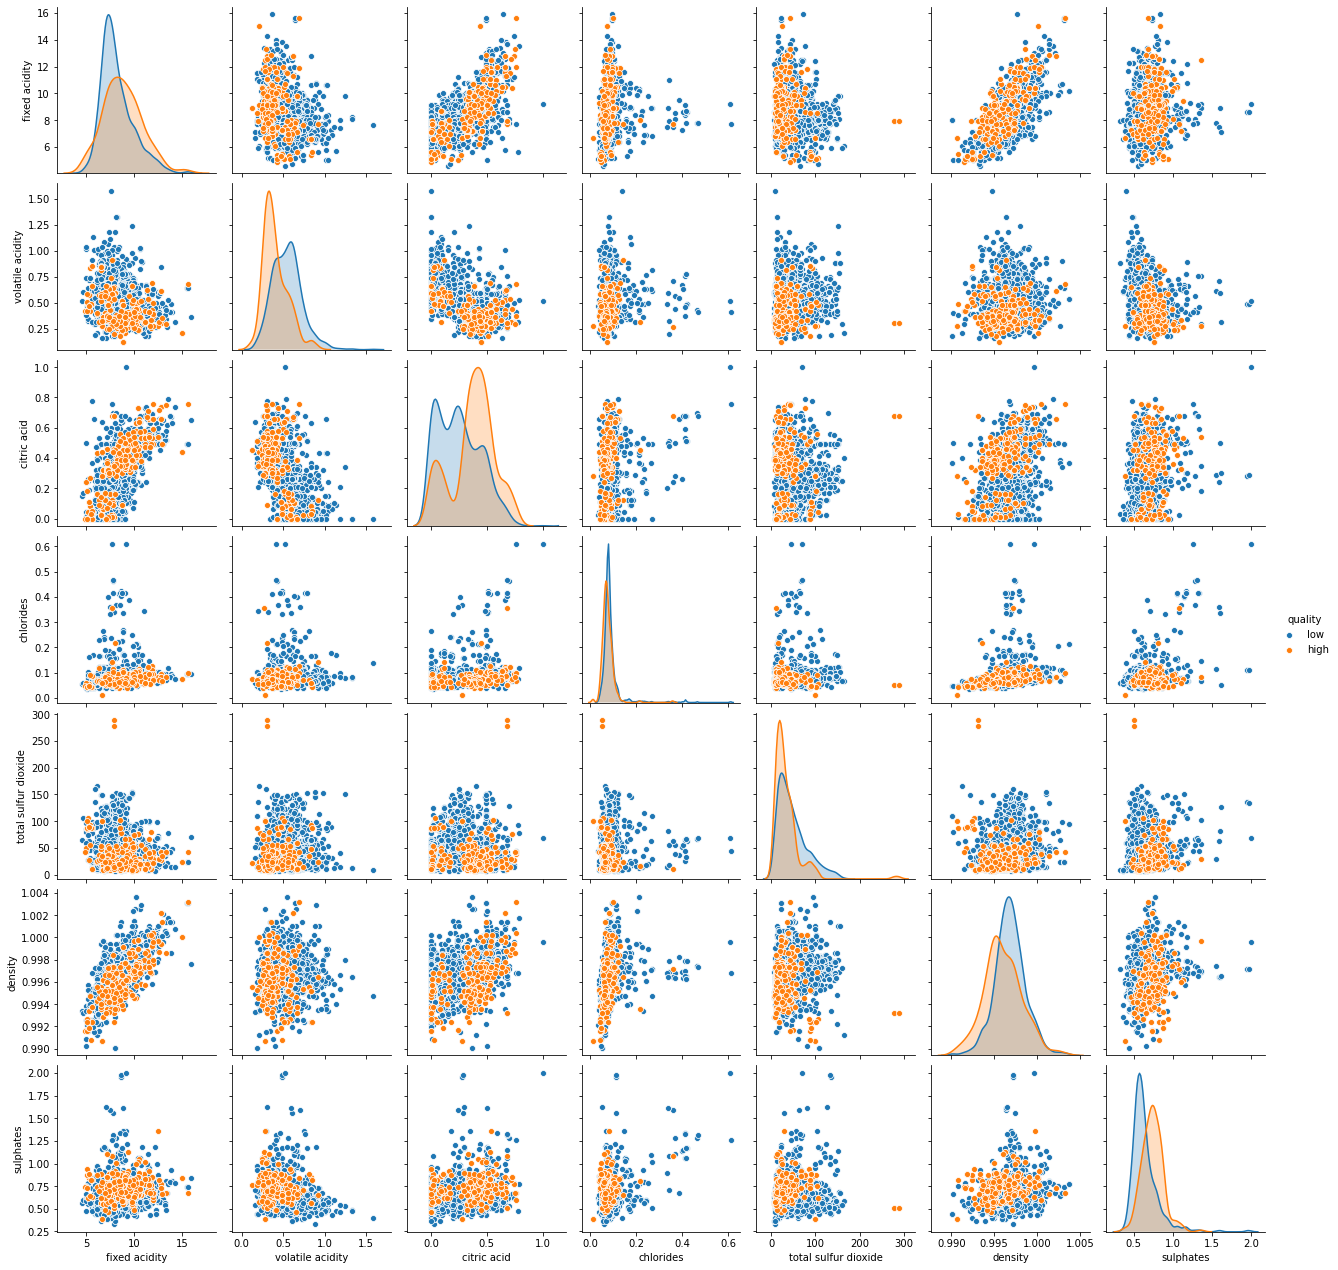

In [11]:
sns.pairplot(df2, hue = 'quality')

In [12]:
# Save this to a new csv file and we can do the clustering algorithms in a separate notebook
df2.to_csv('winequality-red_reduced.csv')

## PCA

In [13]:
pca = PCA(n_components = 11)
dataPCA = pca.fit_transform( df.iloc[:,:-1].to_numpy() )
df3 = pd.DataFrame(dataPCA)
df3['quality'] = df['quality']

In [14]:
df3

0          1         2         3         4         5         6  \
0    -13.224905  -2.023900 -1.126821 -0.399233 -1.085389 -0.198018  0.031547   
1     22.037724   4.408322 -0.310378 -0.199938 -0.557109 -0.301325  0.223874   
2      7.162673  -2.501461 -0.581868 -0.219069 -0.552934 -0.205114  0.136190   
3     13.430063  -1.951122  2.634040 -1.574059 -0.063806  0.089092 -0.218923   
4    -13.224905  -2.023900 -1.126821 -0.399233 -1.085389 -0.198018  0.031547   
...         ...        ...       ...       ...       ...       ...       ...   
1594   1.129111  16.313102 -1.860069 -0.257109 -0.200974 -0.058238 -0.020342   
1595   9.489984  21.627525 -1.986558 -0.027199  0.443711  0.040335  0.102762   
1596  -3.431354  14.271243 -1.750719  0.174652  0.236271  0.089513  0.078622   
1597   1.132878  16.316167 -2.134414 -0.235388 -0.519028  0.015548  0.094561   
1598  -3.874377   3.126348 -1.874149  1.700674  0.104330  0.400244 -0.161218   

             7         8         9        10 quality  
0    -0.147051  0.006047  0.008585  0.000262     low  
1     0.143165 -0.089312 -0.015483  0.000243     low  
2     0.058480 -0.084793 -0.005749  0.000346     low  
3    -0.062244  0.006281  0.004586 -0.000747     low  
4    -0.147051  0.006047  0.008585  0.000262     low  
...        ...       ...       ...       ...     ...  
1594  0.039370  0.019054  0.008953 -0.000058     low  
1595 -0.015382  0.031433 -0.025658  0.000546     low  
1596  0.026835 -0.020558 -0.016826  0.001028     low  
1597 -0.041732  0.128439 -0.023328 -0.000269     low  
1598  0.090191  0.120132 -0.037690  0.000835     low  

[1599 rows x 12 columns]

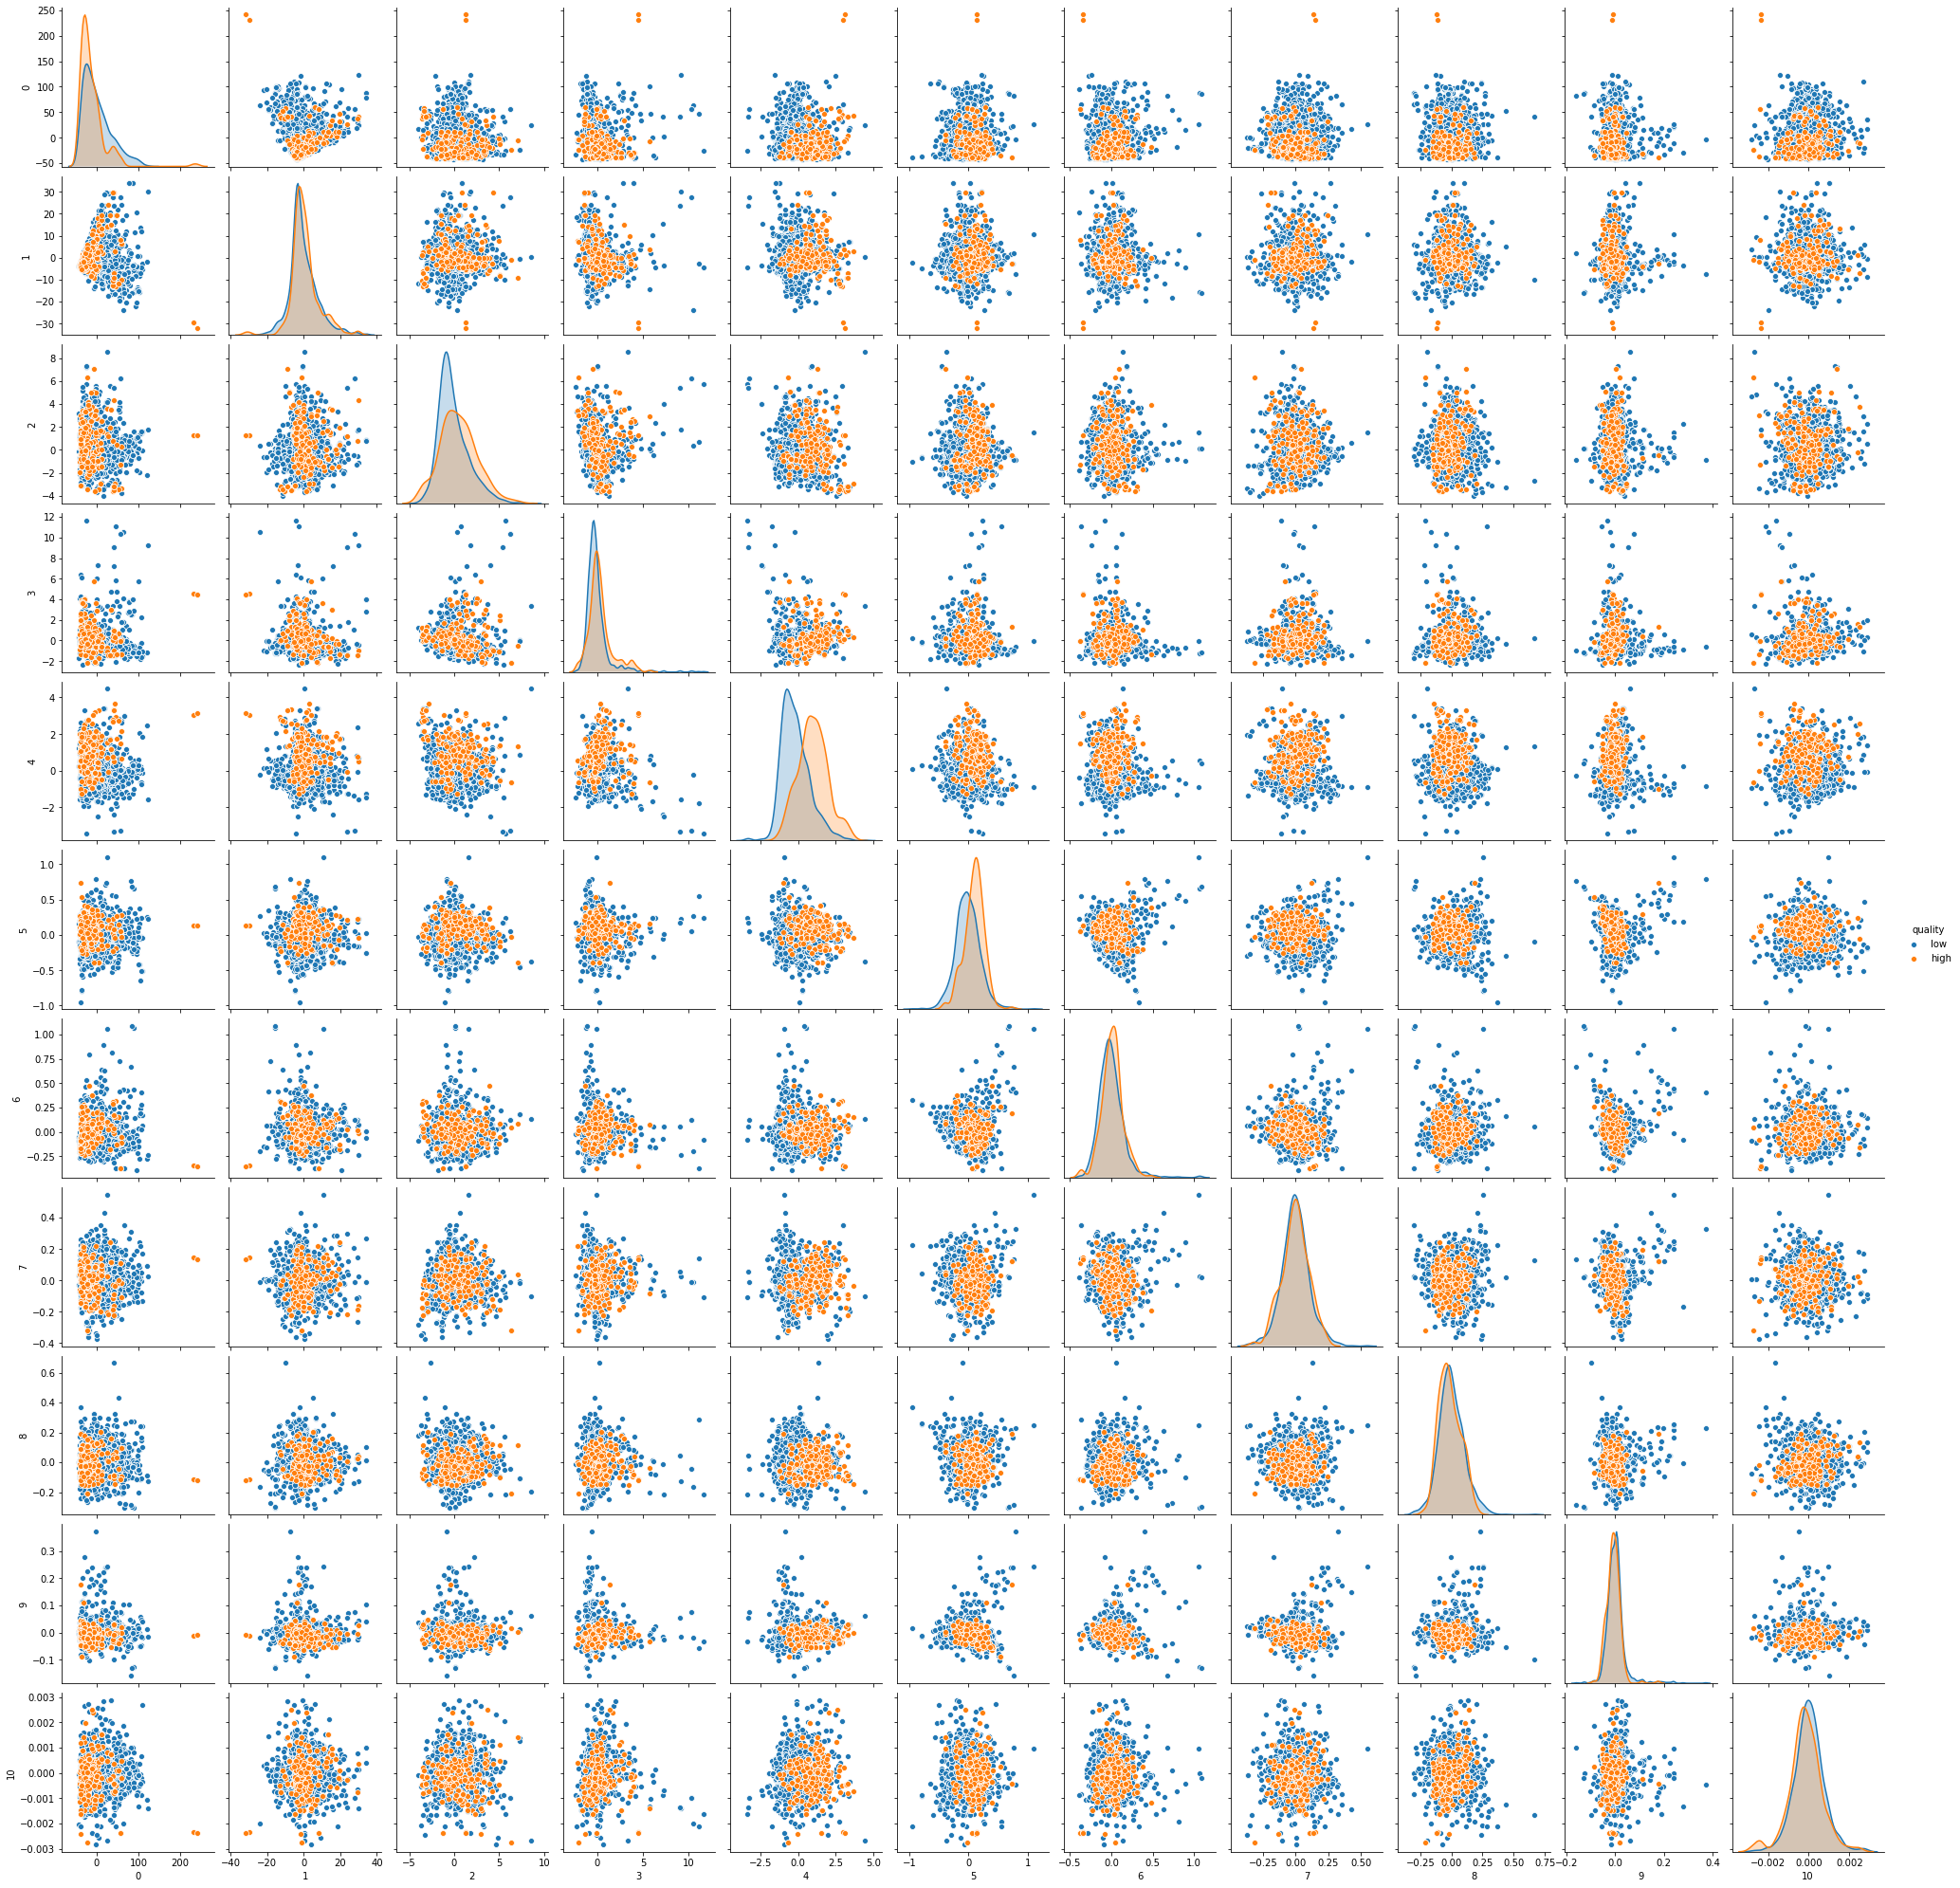

In [15]:
# Pairwise scatterplot of the pca transformed data
sns.pairplot(df3, hue='quality')

<BarContainer object of 11 artists>

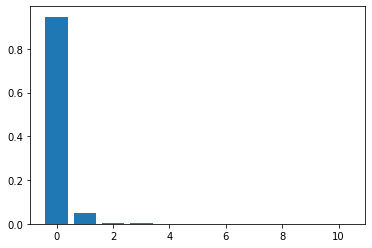

In [16]:
plt.bar(range(0,11), pca.explained_variance_ratio_)

This bar chart of the ratios tells me that we would be unlikely to need to use more than 4 principle components

In [17]:
df3.to_csv('winequality-red_pca.csv')